# Laboration Maskininlärning:

## **Disease prediction**

### Initial EDA av "cardio_train.csv"-dataset: 

In [563]:
# importera nödvändiga  bibliotek 

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# läs in csv_fil och döp om till ett mer förståligt namn
df = pd.read_csv("/Users/paraugustsson/Machine-learning-AI24-1/cardio_train.csv", sep=";")

df_cardio = df

# Läs de 50 första radern
df_cardio.head(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [564]:
# Läs de 25 sista raderna
df_cardio.tail(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69975,99963,21264,2,182,100.0,120,80,1,1,0,0,1,1
69976,99964,21699,1,163,65.0,120,80,2,2,0,0,1,0
69977,99965,16843,1,168,75.0,120,79,1,1,0,0,1,0
69978,99967,18800,1,163,78.0,90,60,1,1,0,0,1,1
69979,99969,22423,1,163,74.0,160,100,2,2,0,0,1,1
69980,99971,17727,2,167,69.0,110,80,1,1,0,1,0,0
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1
69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,0
69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1


### Analys: 
Genom en snabb överblick av de 25 första raderna och de sista 5 i datasetet så ser vi att det som sticker ut här är kolumnen ID som verkar varje enksild undersökningspersons unika nummer och att detta verkar följa en numerisk ordning nerifrån och upp emn att de hoppar över ibland pga av utebliven/ofullständiog data från dessa. Däremot har denna information inget värde för oss i denna uppgift som skall se samband mellan sjukdomsorsaker. Så denna kan vi ta bort me först lite mer explorativ datanalys innan detta.  

In [565]:
# Ta bort kolumnen "id" för den är inte relevant för min analys
df_cardio = df_cardio.drop(columns=["id"], axis= 1 )


In [566]:
# Kolla vilka datatyper som finns i df och om det finns några null värden?
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [567]:
# Kolla mer ingende på datasettet: min, max, medelvärde, standardavvikelse etc.
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [568]:
# SKapa en ny kolumn med kvinor och män
df_cardio["gender_label"] = df_cardio["gender"].map({1: "Female", 2: "Male"})
df_cardio.head()

# Kolla andel kvinnor och män i datasettet
df_cardio.gender.value_counts()

# Visa andelen kvinnor och män i procent
gender_share = df_cardio.gender_label.value_counts(normalize=True).round(2) * 100
print(f"Share of women and men in the data set: \n{gender_share}")


Share of women and men in the data set: 
gender_label
Female    65.0
Male      35.0
Name: proportion, dtype: float64


Det är nästa dubbelt så många kvinor som män i datasettet. 

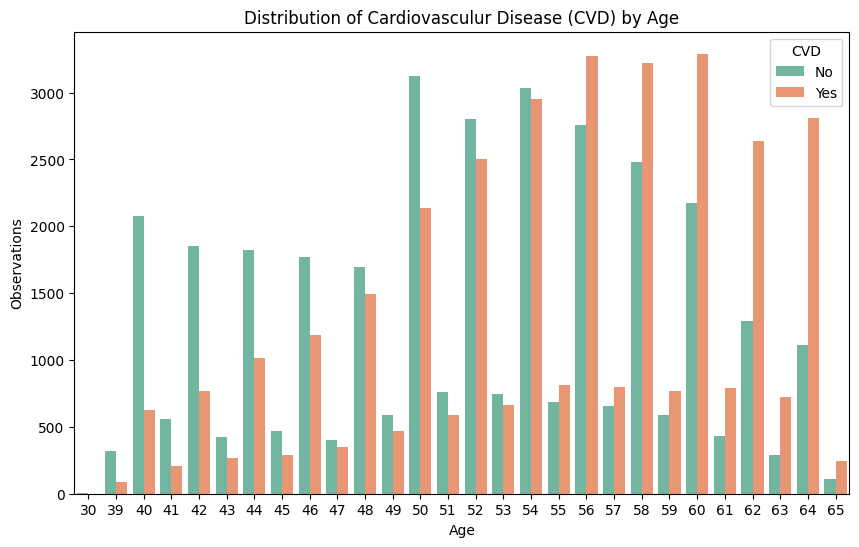

In [569]:
from matplotlib import rcParams

# Sätt storleken på plottear 
rcParams["figure.figsize"] = 10, 6


# Ändra värdena i kolumnen cardio till Yes och No
df_cardio["CVD"] = df_cardio["cardio"].map({1: 'Yes', 0: 'No'}) # kodhjälp" prompt"XX"

# Plotta en countplot för att se hur många som har hjärt- och kärlsjukdomar
rcParams["figure.figsize"] = 10, 6
df_cardio["age_years"] = (df_cardio["age"] / 365).round().astype("int")
sns.countplot(x="age_years", hue="CVD", data=df_cardio, palette="Set2")
plt.title("Distribution of Cardiovasculur Disease (CVD) by Age")
plt.xlabel("Age")
plt.ylabel("Observations")
plt.show()

__OBS!__ Källa kod: https://www.kaggle.com/code/sulianova/eda-cardiovascular-data 

# EDA

#### Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [570]:
cardio_counts = df_cardio["CVD"].value_counts()
print(f"Distribution of Cardiovasculuar Disease:\n{cardio_counts}")


Distribution of Cardiovasculuar Disease:
CVD
No     35021
Yes    34979
Name: count, dtype: int64


/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_20625/4080132681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CVD", data=df_cardio, palette="Set2")


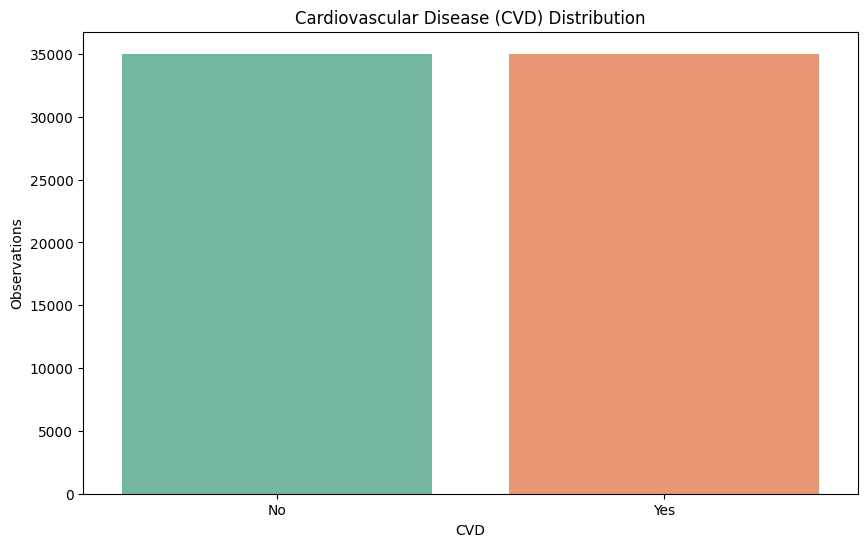

In [571]:
# Plotta en countplot för att se hur många som har CVD och inte
sns.countplot(x="CVD", data=df_cardio, palette="Set2")
plt.title("Cardiovascular Disease (CVD) Distribution")
plt.xlabel("CVD")
plt.ylabel("Observations")
plt.show()

__Analys:__ Liknande fördelning mellan sjuka och friska i hjärt kärlsjukdom  

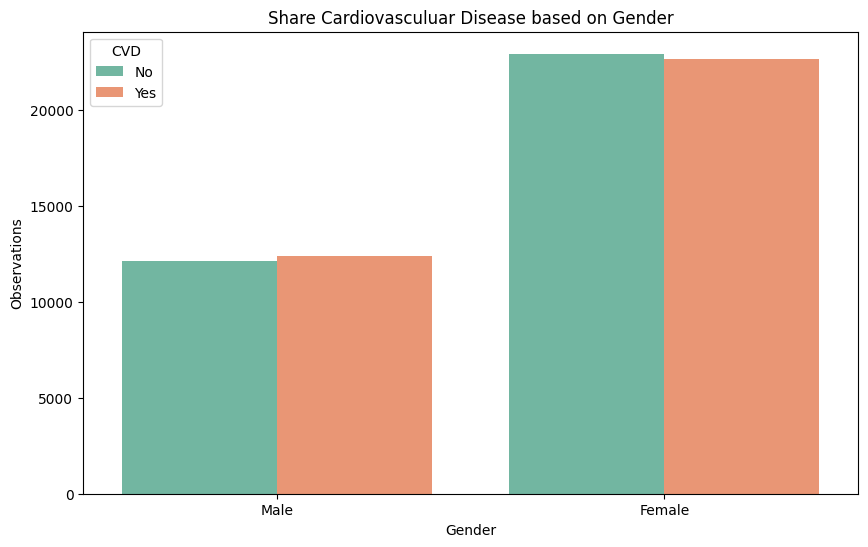

In [572]:
# Skapa en countplot för CVD på kön 
sns.countplot(x="gender_label", data=df_cardio, hue="CVD", palette="Set2")
plt.title("Share Cardiovasculuar Disease based on Gender")
plt.xlabel("Gender")
plt.ylabel("Observations")
plt.show()


__Analys:__ Ganska lika fördelning sett till kön med. Med en liten övervikt till friska i hjärt- och kärlsjukdom för kvinnor. Tvärtom för män där det är en liten övervikt till sjuka.

### Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

Cholesterol per Categhory in (%): 
cholesterol
1    74.8
2    13.6
3    11.5
Name: count, dtype: float64


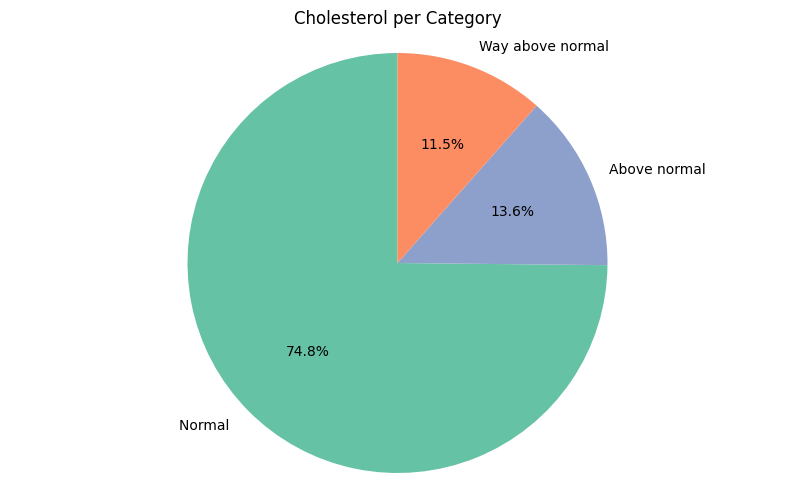

In [573]:

# Räkna antalet observationer i varje kategori för kolesterol och sertera dem efter index
cholesterol_counts = df_cardio["cholesterol"].value_counts().sort_index()

# Beräkna andelen (i procent) för varje kategori
cholesterol_percentages = round((cholesterol_counts / len(df) * 100), 1)
print(f"Cholesterol per Categhory in (%): \n{cholesterol_percentages}")

# Skapa etiketter för dessa kategorier: 1 = Normalt, 2 = Över normalt, 3 = Långt över normalt
labels = ["Normal ", "Above normal", "Way above normal"]

# Rita tårtdiagram
# Kod-bit från: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
plt.pie(cholesterol_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#8da0cb", "#fc8d62",])
plt.axis('equal')
plt.title('Cholesterol per Category')
plt.show()

In [574]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label', 'CVD',
       'age_years'],
      dtype='object')

__Analys:__ Majoriteten av individer har normala kolesterolvärden, medan en mindre andel har höga kolesterolvärden. Men av dessa två är det ganska likt.

### EDA forts:
- Hur ser åldersfördelningen ut? 
- Hur stor andel röker?
- Hur ser viktfördelningen ut? 
- Hur ser längdfördelningen ut? 
- Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

Väljer att göra en subplot för att göra det lite mer överskådligt. Tar även med de plottar jag redan gjort sen innan. 

/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_20625/2428817592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CVD", data=df_cardio, palette="Set2", ax=ax[0, 0])


Text(0, 0.5, 'Observations')

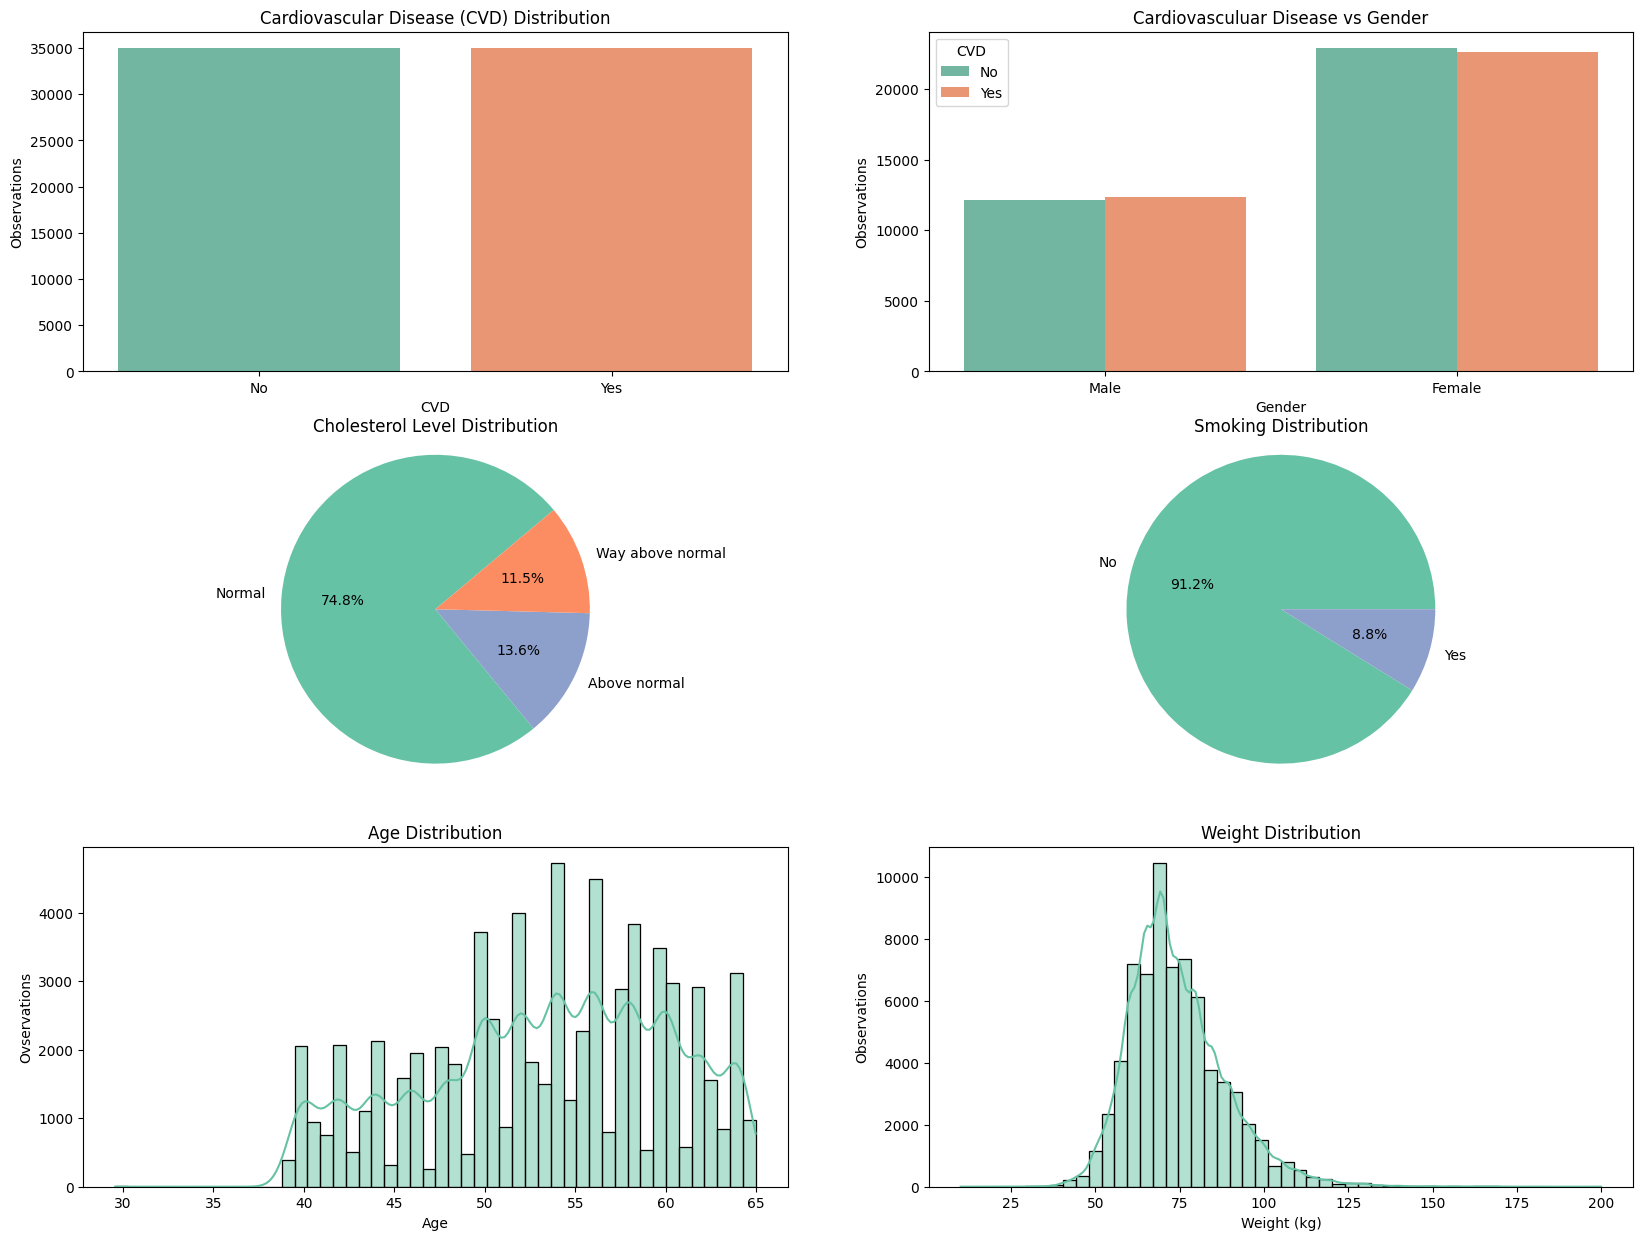

In [575]:
# skapa subplots för att visa flera grafer samtidigt:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# Tar med min countplot för Cardioascular Disease sen innan:
sns.countplot(x="CVD", data=df_cardio, palette="Set2", ax=ax[0, 0])
ax[0, 0].set_title("Cardiovascular Disease (CVD) Distribution")
ax[0, 0].set_xlabel("CVD")
ax[0, 0].set_ylabel("Observations") 

# Lägg till en countplot för att se hur många som har CVD jämfört med kön:
sns.countplot(x="gender_label", data=df_cardio, hue="CVD", palette="Set2", ax=ax[0, 1])
ax[0, 1].set_title("Cardiovasculuar Disease vs Gender")
ax[0, 1].set_xlabel("Gender")
ax[0, 1].set_ylabel("Observations")

# Lägg till min pie-chart över kolesterolnivåer:
cholesterol_labels = ["Normal", "Above normal", "Way above normal"]
ax[1, 0].pie(cholesterol_counts, labels=cholesterol_labels, autopct="%1.1f%%", startangle=40, colors=["#66c2a5", "#8da0cb", "#fc8d62",])
ax[1,0].axis("equal")
ax[1, 0].set_title("Cholesterol Level Distribution")

# Lägg till en pie-chart för att se hur många som röker:
# Mappa om 0 och 1 till No och Yes för att göra det mer läsbart
smoke_counts = df_cardio["smoke"].value_counts()
smoke_labels = smoke_counts.index.map({0: "No", 1: "Yes"})
ax[1, 1].pie(smoke_counts, labels=smoke_labels, autopct="%1.1f%%", colors=["#66c2a5", "#8da0cb", "#fc8d62",])
ax[1,1].axis("equal")
ax[1, 1].set_title("Smoking Distribution")

# Lägg till en histogram för att se fördelningen av ålder:
# Dela ålder med 365 för att få ålder i år
sns.histplot(df_cardio["age"]/365, bins=50, kde=True, color="#66c2a5", ax=ax[2, 0])
ax[2, 0].set_title("Age Distribution")
ax[2, 0].set_xlabel("Age")
ax[2, 0].set_ylabel("Ovservations")

# Lägg till en histogram för att se fördelningen av vikt i datasettet:
sns.histplot(df_cardio["weight"], kde=True, bins=50, color="#66c2a5", ax=ax[2, 1])
ax[2, 1].set_title("Weight Distribution")
ax[2, 1].set_xlabel("Weight (kg)")
ax[2, 1].set_ylabel("Observations")



$$
\text{BMI} = \frac{\text{Vikt (kg)}}{(\text{Längd (cm)}/100)^2}
$$

### Feature engineering BMI

In [576]:
# Skapa en ny kolumn med BMI baserat på formel för BMI = vikt / (längd i meter)^2
df_cardio["BMI"] = round(df_cardio["weight"] / ((df_cardio["height"] / 100) ** 2), 2)

# Ta bort orimliga värden / outliers
df_cardio = df_cardio.drop(df_cardio[(df_cardio["BMI"] > 80) | (df_cardio["BMI"] < 15)].index, axis=0)

# Visa de första raderna för att verifiera att kolumnen lagts till
print(df_cardio[["weight", "height", "BMI"]].head())
print(df_cardio.columns)

   weight  height    BMI
0    62.0     168  21.97
1    85.0     156  34.93
2    64.0     165  23.51
3    82.0     169  28.71
4    56.0     156  23.01
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label', 'CVD',
       'age_years', 'BMI'],
      dtype='object')


In [577]:
# Defina vilkoren för BMI-gränserna. 
BMI_cond = [
    (df_cardio["BMI"] >= 18.5) & (df_cardio["BMI"] < 25),
    (df_cardio["BMI"] >= 25) & (df_cardio["BMI"] < 30),
    (df_cardio["BMI"] >= 30) & (df_cardio["BMI"] < 35),
    (df_cardio["BMI"] >= 35) & (df_cardio["BMI"] < 40),
    (df_cardio["BMI"] >= 40)
]

# Definiera de kategorier vilkoren skall tilldelas  
BMI_cat = ["Normal range", "Overweight", "Obese (class I)", "Obese (class II)", "Obese (class III)"]

# Använd np.select för att skapa en ny kolumn i df_cardio.
df_cardio["BMI_cat"] = np.select(BMI_cond, BMI_cat, default="Out of range")

print(df_cardio[["BMI", "BMI_cat"]])

         BMI            BMI_cat
0      21.97       Normal range
1      34.93    Obese (class I)
2      23.51       Normal range
3      28.71         Overweight
4      23.01       Normal range
...      ...                ...
69995  26.93         Overweight
69996  50.47  Obese (class III)
69997  31.35    Obese (class I)
69998  27.10         Overweight
69999  24.91       Normal range

[69940 rows x 2 columns]


Gränserna för kategorierna drogs baserat på dels wikepdias gräsner för BMI utofrpn deras graf och deras tabell med gränsvärden för BMI men även från livsmedelsverkets hemsida. Sedan togs extremvärden bort baserat mer godtycligt men på rekomnederade gärnsvärden. men sedan även lite höjd för övervikt och undervikt.

## Feature engineering blodtryck

EDA för att hitta outliers:

In [578]:
df_cardio.columns
df_cardio[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,69940.000000,69940.000000
mean,128.820346,96.629883
std,154.075574,188.514077
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


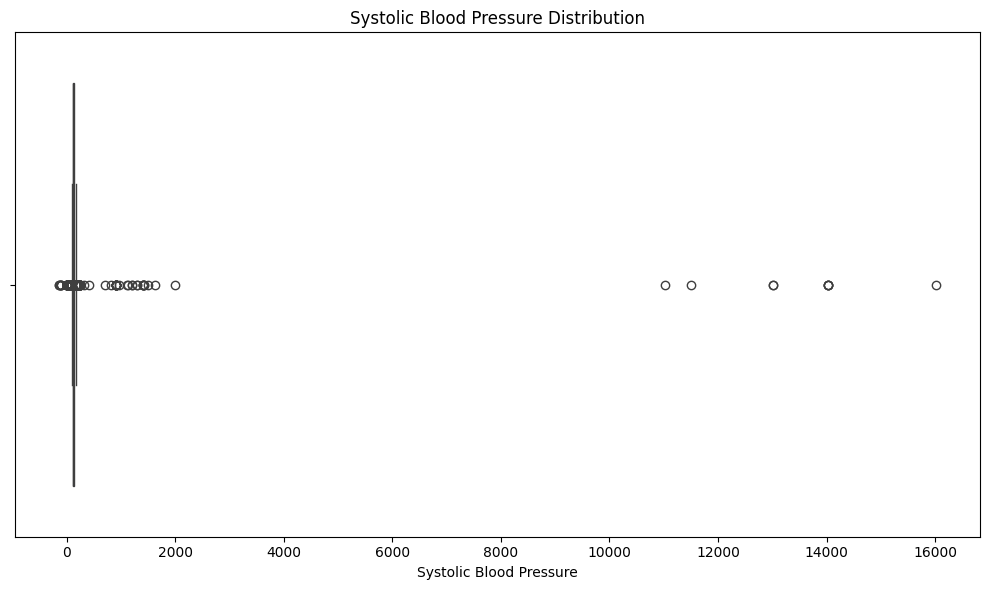

In [579]:
sns.boxplot(x="ap_hi", data=df_cardio)
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic Blood Pressure")
plt.tight_layout()
plt.show()


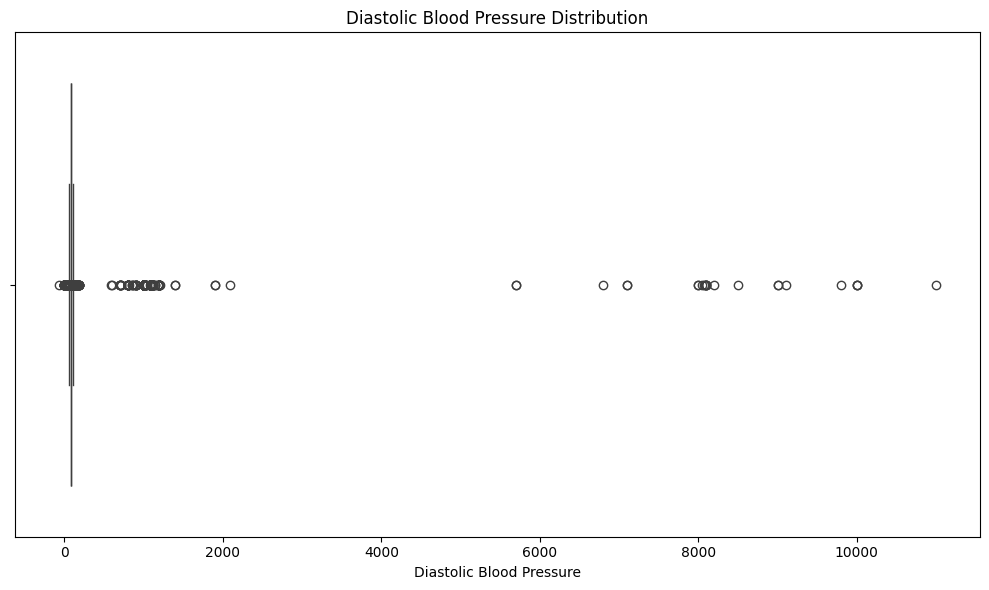

In [580]:
sns.boxplot(x="ap_lo", data=df_cardio)
plt.title("Diastolic Blood Pressure Distribution") 
plt.xlabel("Diastolic Blood Pressure")
plt.tight_layout()
plt.show()

Ta bort negativa blodtrycksvärden och orimliga? EDA på orimliga värden  

In [581]:
# Ta bort samples med orimliga systoliska/diastoliska värden baserat på orimliga värden / fel i mätningarna
df_cardio = df_cardio[(df_cardio['ap_hi'] >= 80) & (df_cardio['ap_hi'] <= 250)]
df_cardio = df_cardio[(df_cardio['ap_lo'] >= 50) & (df_cardio['ap_lo'] <= 200)]

# Ta bort om diastoliskt > systoliskt
df_cardio = df_cardio[df_cardio['ap_lo'] <= df_cardio['ap_hi']]

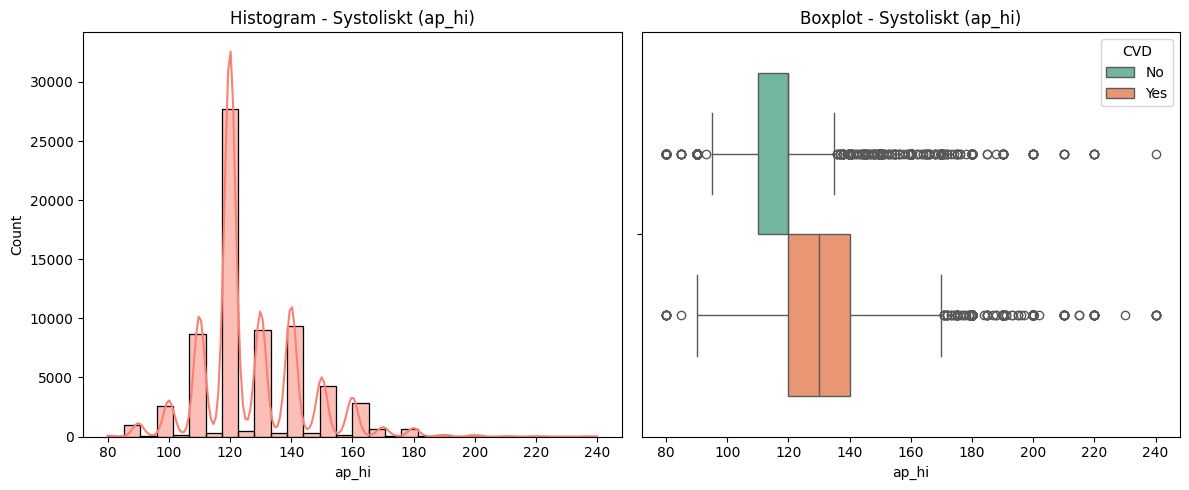

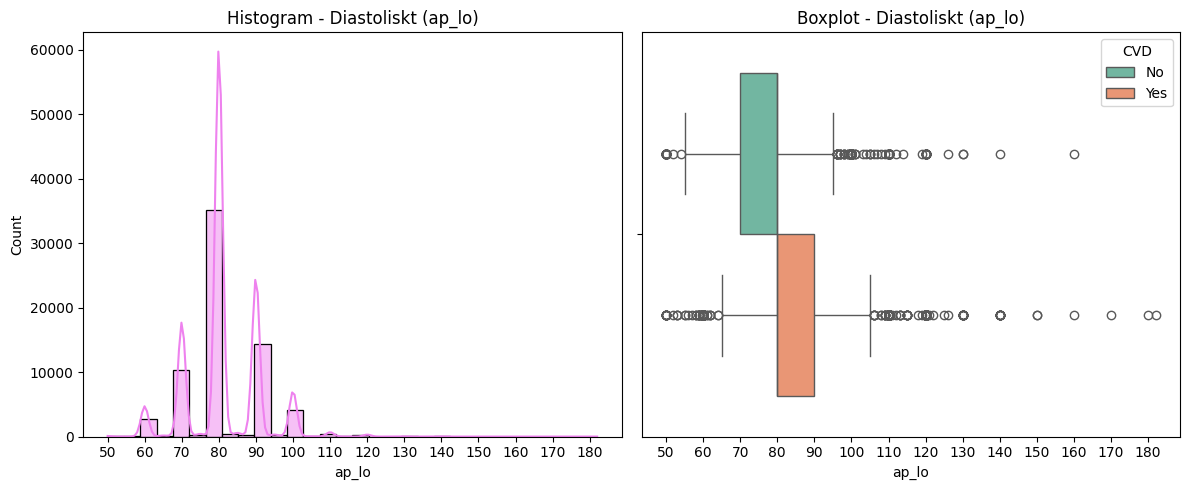

In [582]:
# Mina första sub.plot grafer blev inte supertydliag ville kunan se tydliagre gränser för outliers i blodtrycj  Bad därför chatg GPT om hjälp med hur man ändrar skalan. Prompt"XX" 
from matplotlib.ticker import ScalarFormatter

# Sätt en högre antal bins för histogrammet
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_cardio, x='ap_hi', kde=True, ax=axes[0], bins=30, color='salmon')
axes[0].set_title('Histogram - Systoliskt (ap_hi)')
# Tvinga fram plain notation och ställ in egna ticklabels
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].set_xticks(np.arange(df_cardio['ap_hi'].min(), df_cardio['ap_hi'].max()+1, 20))

sns.boxplot(data=df_cardio, x='ap_hi', ax=axes[1], hue="CVD", palette='Set2')
axes[1].set_title('Boxplot - Systoliskt (ap_hi)')
# För boxplot kan du också sätta xticks om det behövs:
axes[1].xaxis.set_major_formatter(ScalarFormatter()) 
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].set_xticks(np.arange(df_cardio['ap_hi'].min(), df_cardio['ap_hi'].max()+1, 20))

plt.tight_layout()
plt.show()

# För diastoliskt tryck
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_cardio, x='ap_lo', kde=True, ax=axes[0], bins=30, color='violet')
axes[0].set_title('Histogram - Diastoliskt (ap_lo)')
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].set_xticks(np.arange(df_cardio['ap_lo'].min(), df_cardio['ap_lo'].max()+1, 10))

sns.boxplot(data=df_cardio, x='ap_lo', ax=axes[1], hue= "CVD", palette='Set2')
axes[1].set_title('Boxplot - Diastoliskt (ap_lo)')
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].set_xticks(np.arange(df_cardio['ap_lo'].min(), df_cardio['ap_lo'].max()+1, 10))

plt.tight_layout()
plt.show()

Valet av värden.....

Hitta och ta bort anatlet negativa blodtrycksvärden då man inte kan ha ett negativt blodtryck utan dessa värden är fel i data settet. 

In [583]:
# Räkna antalet negativa värden i 'ap_hi'
negative_ap_hi_count = (df_cardio['ap_hi'] < 0).sum()
print("Antal negativa värden i ap_hi:", negative_ap_hi_count)

# Räkna antalet negativa värden i 'ap_lo'
negative_ap_lo_count = (df_cardio['ap_lo'] < 0).sum()
print("Antal negativa värden i ap_lo:", negative_ap_lo_count)

# Ta bort negativa värden från df_cardio.
df_cardio = df_cardio[(df_cardio['ap_hi'] >= 0) & (df_cardio['ap_lo'] >= 0)]

# Kontrollera att negativa värden har tagits bort
negative_ap_hi_count = (df_cardio['ap_hi'] < 0).sum()
negative_ap_lo_count = (df_cardio['ap_lo'] < 0).sum()
print("Antal negativa värden i ap_hi efter borttagning:", negative_ap_hi_count)
print("Antal negativa värden i ap_lo efter borttagning:", negative_ap_lo_count)

Antal negativa värden i ap_hi: 0
Antal negativa värden i ap_lo: 0
Antal negativa värden i ap_hi efter borttagning: 0
Antal negativa värden i ap_lo efter borttagning: 0


Kolla hur många Diastoliska (undertryck) värden överstiger systoliskt (övertryck) och ta bort dessa då det inte är möjligt utan är reultatte av felmätning eller felinskrivning i datasettet. Källa:...

In [584]:
# Skriv anatalet värden där diastoliskt överstiger systoliskt värde. 
print("Diastilic pressure is higher than systolic one in {0} cases".format(df_cardio[df_cardio['ap_lo']> df_cardio['ap_hi']].shape[0]))

# Ta bort värden sär diastoliskt > systoliskt
df_cardio = df_cardio[df_cardio['ap_lo'] <= df_cardio['ap_hi']]
print("Antalet diastoliska värden som överstiger sysolsika värden efter borttagning i {0}".format(df_cardio[df_cardio['ap_lo']> df_cardio['ap_hi']].shape[0]))


Diastilic pressure is higher than systolic one in 0 cases
Antalet diastoliska värden som överstiger sysolsika värden efter borttagning i 0


In [585]:
# Ta bort samples med orimliga systoliska/diastoliska värden
df_cardio = df_cardio[(df_cardio['ap_hi'] >= 90) & (df_cardio['ap_hi'] <= 200)]
df_cardio = df_cardio[(df_cardio['ap_lo'] >= 60) & (df_cardio['ap_lo'] <= 110)]

df_cardio[['ap_hi', 'ap_lo']].describe()




,ap_hi,ap_lo
count,68178.000000,68178.000000
mean,126.522192,81.221699
std,16.194993,9.018304
min,90.000000,60.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,200.000000,110.000000


Valet av gränsdraging for orimliga värden gjordes av de olika kritirierna för vad som anses vara ett för högt och frö lågt blodtryck i dels genom https://www.healthline.com/health/high-blood-pressure-hypertension#causes och https://kunskapsstodforvardgivare.se/omraden/hjart--och-karlsjukdomar/behandlingsprogram/akut-hjartsjukvard/ovrig-akut-hjartsjukvard/akut-hypertoni. Samt genom att studera histogram och boxplots över ap_hi och ap_lo så der jag de outliers som finns. Med lite mer höjd för de övre värdena i både systolostikt och diasroliskt.  

In [586]:
# skapa en ny kolumn för blodtrycks kategorier
conditions = [
    (df_cardio['ap_hi'] > 180) | (df_cardio['ap_lo'] > 120),
    (df_cardio['ap_hi'] >= 140) | (df_cardio['ap_lo'] >= 90),
    ((df_cardio['ap_hi'] >= 130) & (df_cardio['ap_hi'] <= 139)) | ((df_cardio['ap_lo'] >= 80) & (df_cardio['ap_lo'] <= 89)),
    ((df_cardio['ap_hi'] >= 120) & (df_cardio['ap_hi'] <= 129)) & (df_cardio['ap_lo'] < 80),
    (df_cardio['ap_hi'] < 120) & (df_cardio['ap_lo'] < 80)
]

choices = [
    'Hypertensive Crisis',
    'Hypertension Stage 2',
    'Hypertension Stage 1',
    'Elevated',
    'Normal'
]

df_cardio['bp_category'] = np.select(conditions, choices, default='Undefined')
df_cardio.bp_category

0        Hypertension Stage 1
1        Hypertension Stage 2
2        Hypertension Stage 1
3        Hypertension Stage 2
4                      Normal
                 ...         
69995    Hypertension Stage 1
69996    Hypertension Stage 2
69997    Hypertension Stage 2
69998    Hypertension Stage 1
69999    Hypertension Stage 1
Name: bp_category, Length: 68178, dtype: object

In [587]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label', 'CVD',
       'age_years', 'BMI', 'BMI_cat', 'bp_category'],
      dtype='object')

## Visualiseirg  andel sjukdomar 

/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_20625/1964231988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cardio_pos, x='bp_category', palette='Set2')


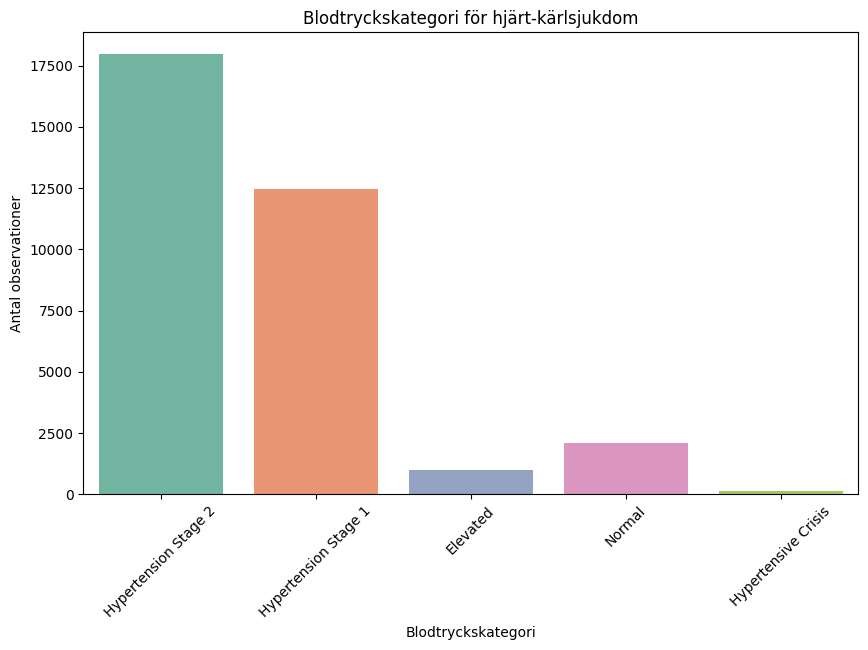

/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_20625/1964231988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cardio_pos, x="gender", palette='Set2')


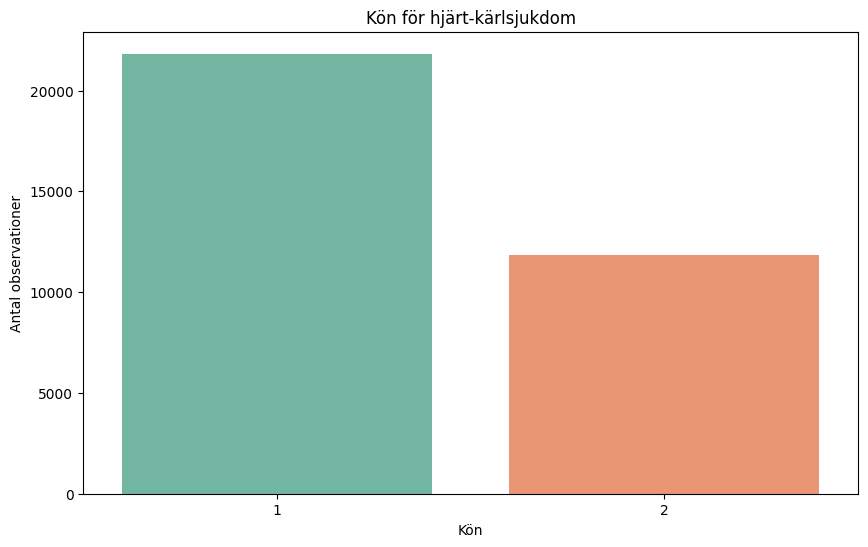

In [588]:
# skapa en df för cardio positiv 
cardio_pos = df_cardio[df_cardio['cardio'] == 1]

# skapa en countplot för bp_category för cardio positiv
plt.figure(figsize=(10, 6))
sns.countplot(data=cardio_pos, x='bp_category', palette='Set2')
plt.title('Blodtryckskategori för hjärt-kärlsjukdom')
plt.xlabel('Blodtryckskategori')
plt.ylabel('Antal observationer')
plt.xticks(rotation=45)
plt.show()

# skapa en countplot för gender för cardio positiv
plt.figure(figsize=(10, 6))
sns.countplot(data=cardio_pos, x="gender", palette='Set2')
plt.title('Kön för hjärt-kärlsjukdom')
plt.xlabel('Kön')
plt.ylabel('Antal observationer')
plt.xticks
plt.show()

In [589]:
# Exempel: Andelen positiva för varje blodtryckskategori
bp_frac = df_cardio.groupby('bp_category')['cardio'].mean().reset_index()
bp_frac.columns = ['bp_category', 'fraction_positive']  # Byt gärna namn för tydlighet

# Exempel: Andelen positiva för varje BMI-kategori
bmi_frac = df_cardio.groupby('BMI_cat')['cardio'].mean().reset_index()
bmi_frac.columns = ['BMI_cat', 'fraction_positive']

# Exempel: Andelen positiva för varje kolesterolkategori
chol_frac = df_cardio.groupby('cholesterol')['cardio'].mean().reset_index()
chol_frac.columns = ['cholesterol', 'fraction_positive']

# Exempel: Andelen positiva för varje kategorisering könsfördelning
sex_frac = df_cardio.groupby("gender")["cardio"].mean().reset_index()
sex_frac.columns = ["gender", "fraction_positive"]

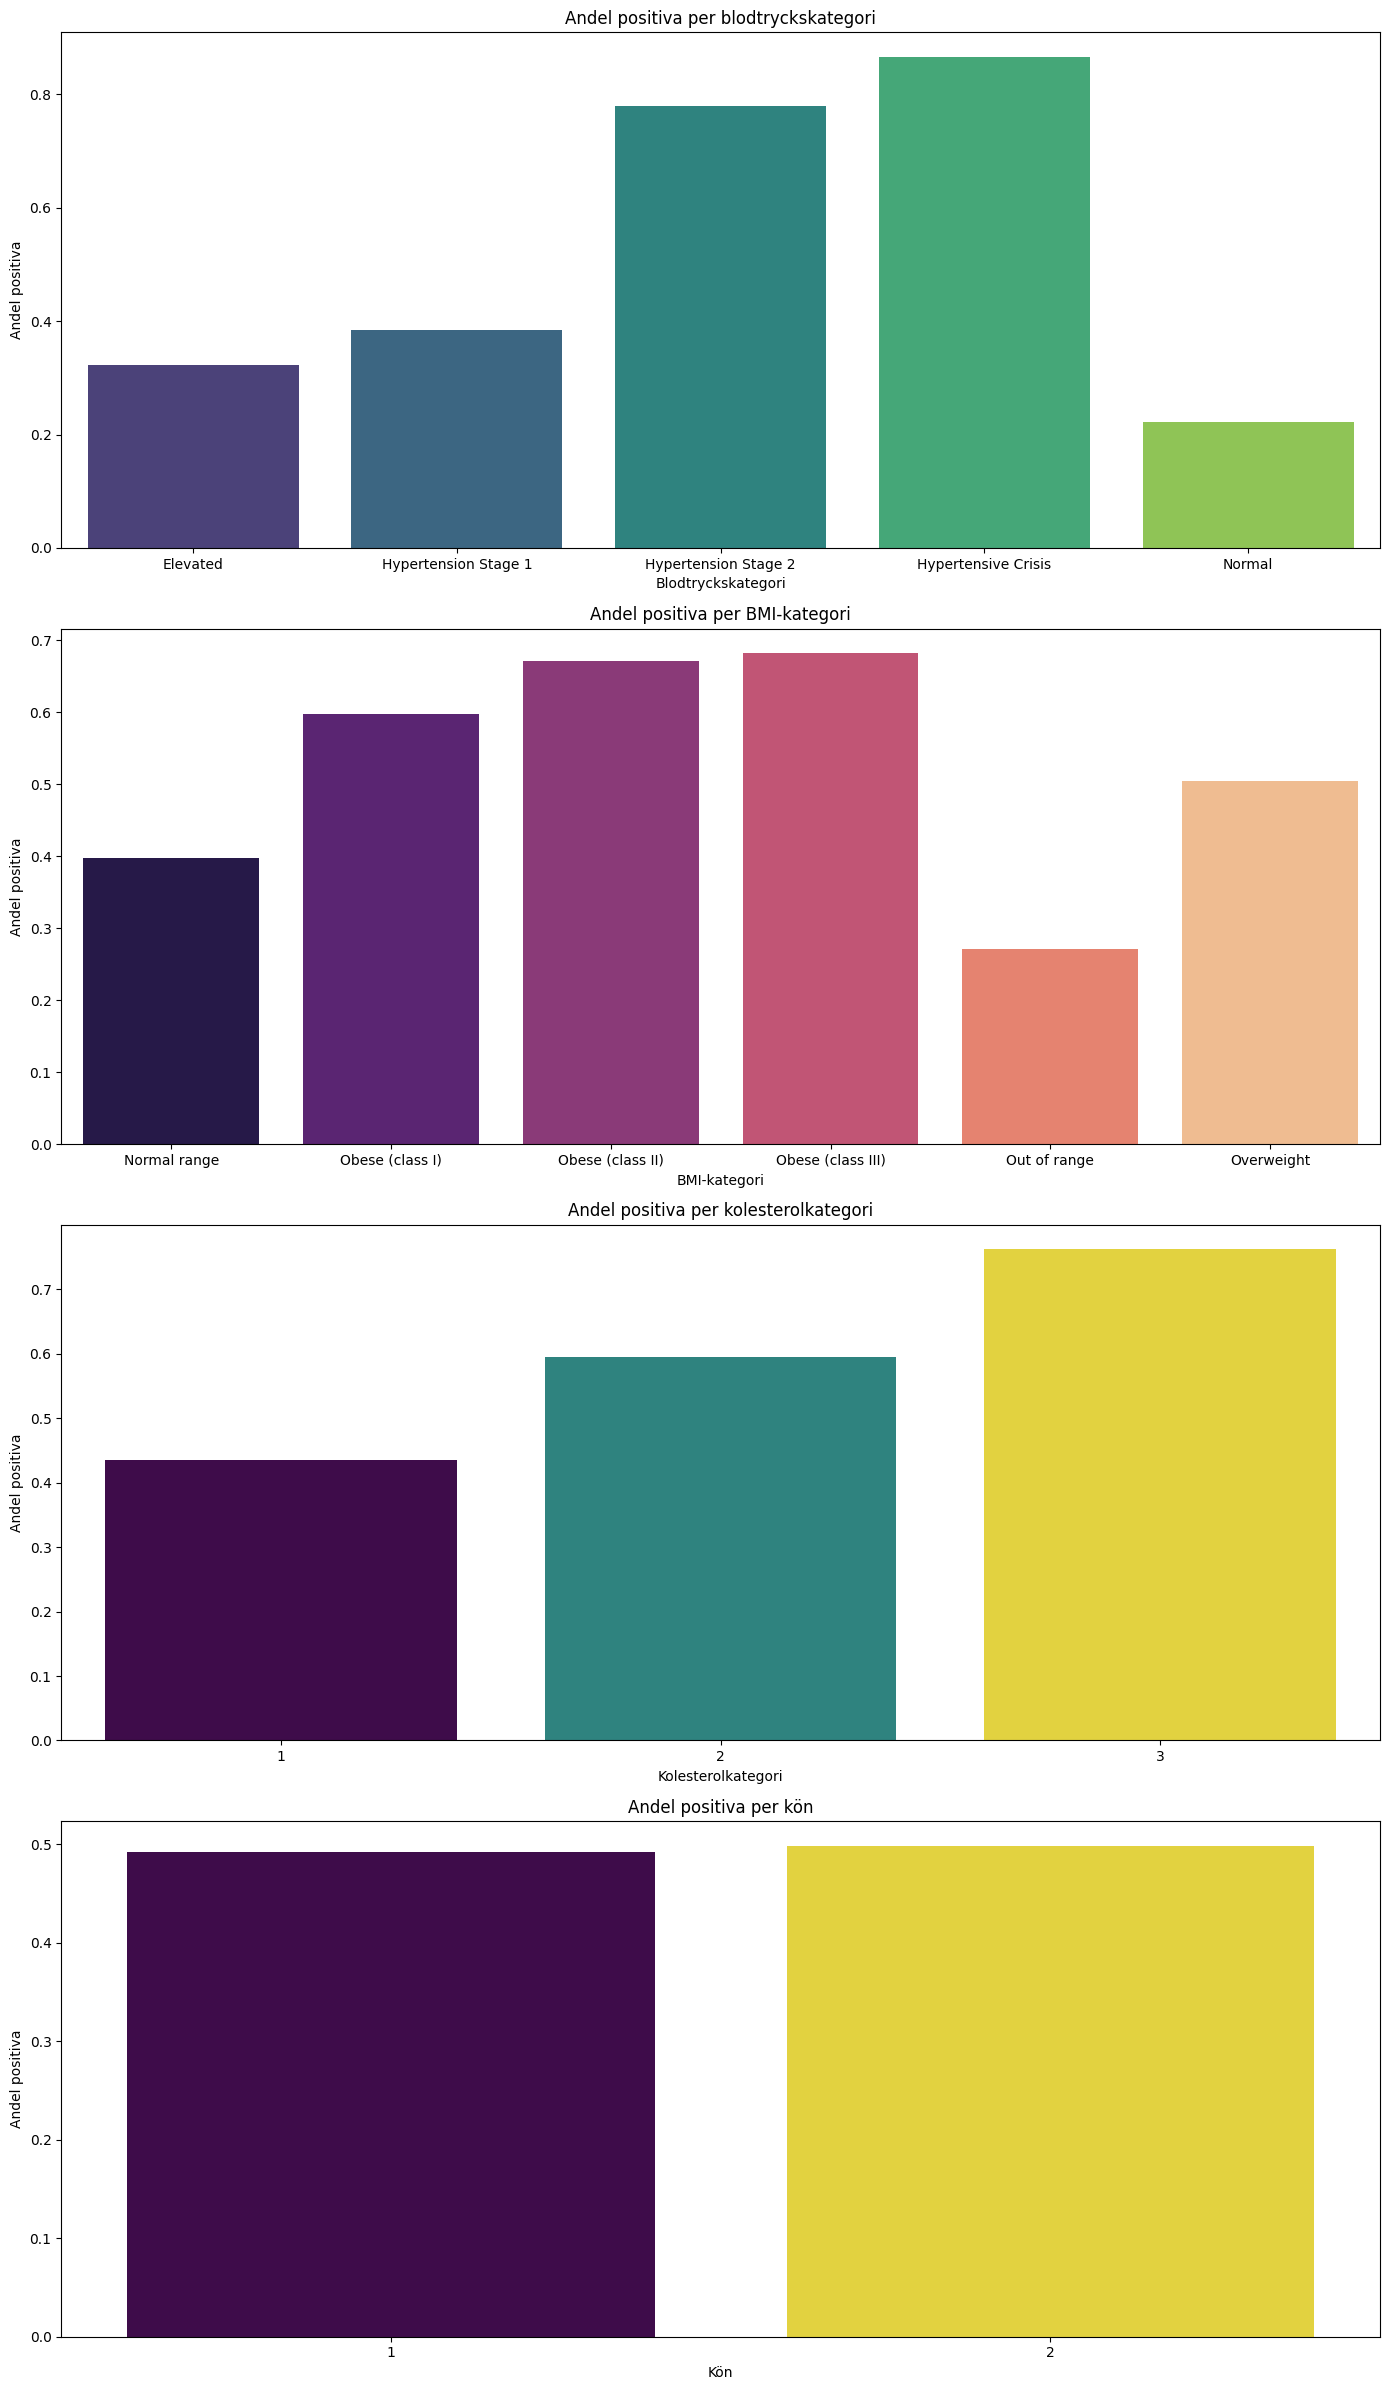

In [590]:
# Exempel: Andelen positiva för varje kolesterolkategori
chol_frac = df_cardio.groupby('cholesterol')['cardio'].mean().reset_index()
chol_frac.columns = ['cholesterol', 'fraction_positive']

fig, axes = plt.subplots(4, 1, figsize=(14, 24))

# Barplot 1: Blodtryckskategorier
sns.barplot(x='bp_category', y='fraction_positive', hue='bp_category', data=bp_frac, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Andel positiva per blodtryckskategori')
axes[0].set_xlabel('Blodtryckskategori')
axes[0].set_ylabel('Andel positiva')

# Barplot 2: BMI-kategorier
sns.barplot(x='BMI_cat', y='fraction_positive', hue='BMI_cat', data=bmi_frac, ax=axes[1], palette='magma', legend=False)
axes[1].set_title('Andel positiva per BMI-kategori')
axes[1].set_xlabel('BMI-kategori')
axes[1].set_ylabel('Andel positiva')

# Barplot 3: Kolesterol
sns.barplot(x='cholesterol', y='fraction_positive', hue='cholesterol', data=chol_frac, ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Andel positiva per kolesterolkategori')
axes[2].set_xlabel('Kolesterolkategori')
axes[2].set_ylabel('Andel positiva')

# Barplot 4: Kön
sns.barplot(x="gender", y="fraction_positive", hue="gender", data=sex_frac, ax=axes[3], palette="viridis", legend=False)
axes[3].set_title("Andel positiva per kön")
axes[3].set_xlabel("Kön")
axes[3].set_ylabel("Andel positiva")

plt.tight_layout()
plt.show()

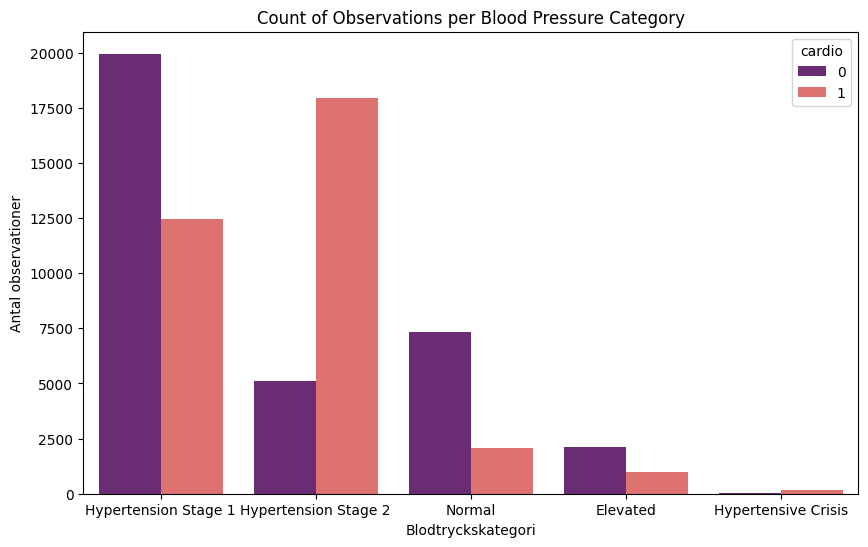

In [591]:
fig, ax = plt.subplots()
sns.countplot(
    x="bp_category",      # The categorical variable
    hue="cardio",         # Split by cardio (0 or 1)
    data=df_cardio, 
    palette="magma", 
    ax=ax
)
ax.set_title('Count of Observations per Blood Pressure Category')
ax.set_xlabel('Blodtryckskategori')
ax.set_ylabel('Antal observationer')
plt.show()

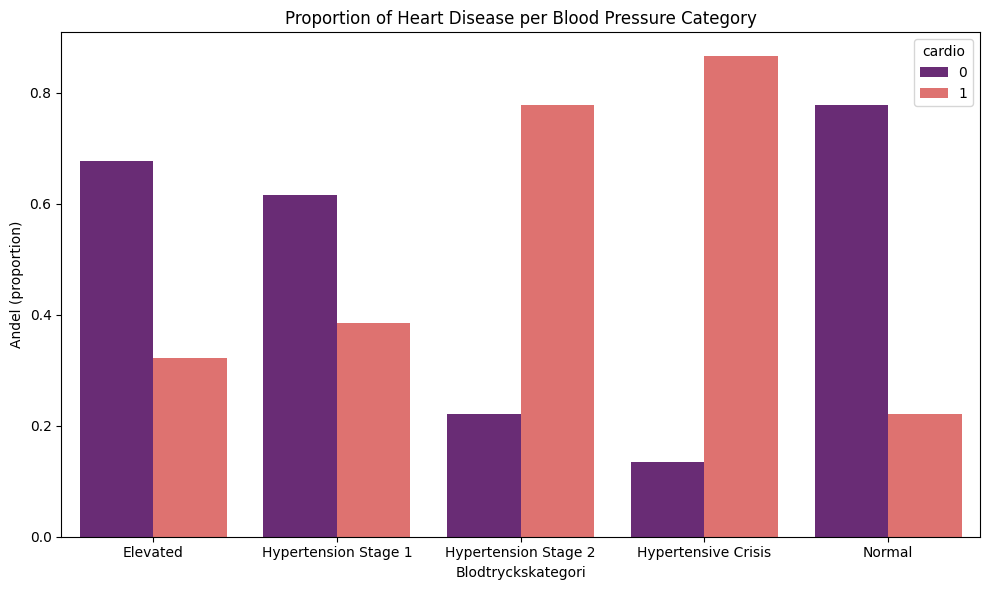

In [592]:
# 1. Count how many rows per (bp_category, cardio)
grouped = df_cardio.groupby(['bp_category', 'cardio']).size().reset_index(name='count')

# 2. Compute total rows per bp_category to get fraction
totals = grouped.groupby('bp_category')['count'].transform('sum')
grouped['proportion'] = grouped['count'] / totals

# 3. Plot as grouped bar chart of proportions
fig, ax = plt.subplots()
sns.barplot(
    x='bp_category', 
    y='proportion', 
    hue='cardio', 
    data=grouped, 
    palette='magma', 
    ax=ax
)
ax.set_title('Proportion of Heart Disease per Blood Pressure Category')
ax.set_xlabel('Blodtryckskategori')
ax.set_ylabel('Andel (proportion)')
plt.tight_layout()
plt.show()

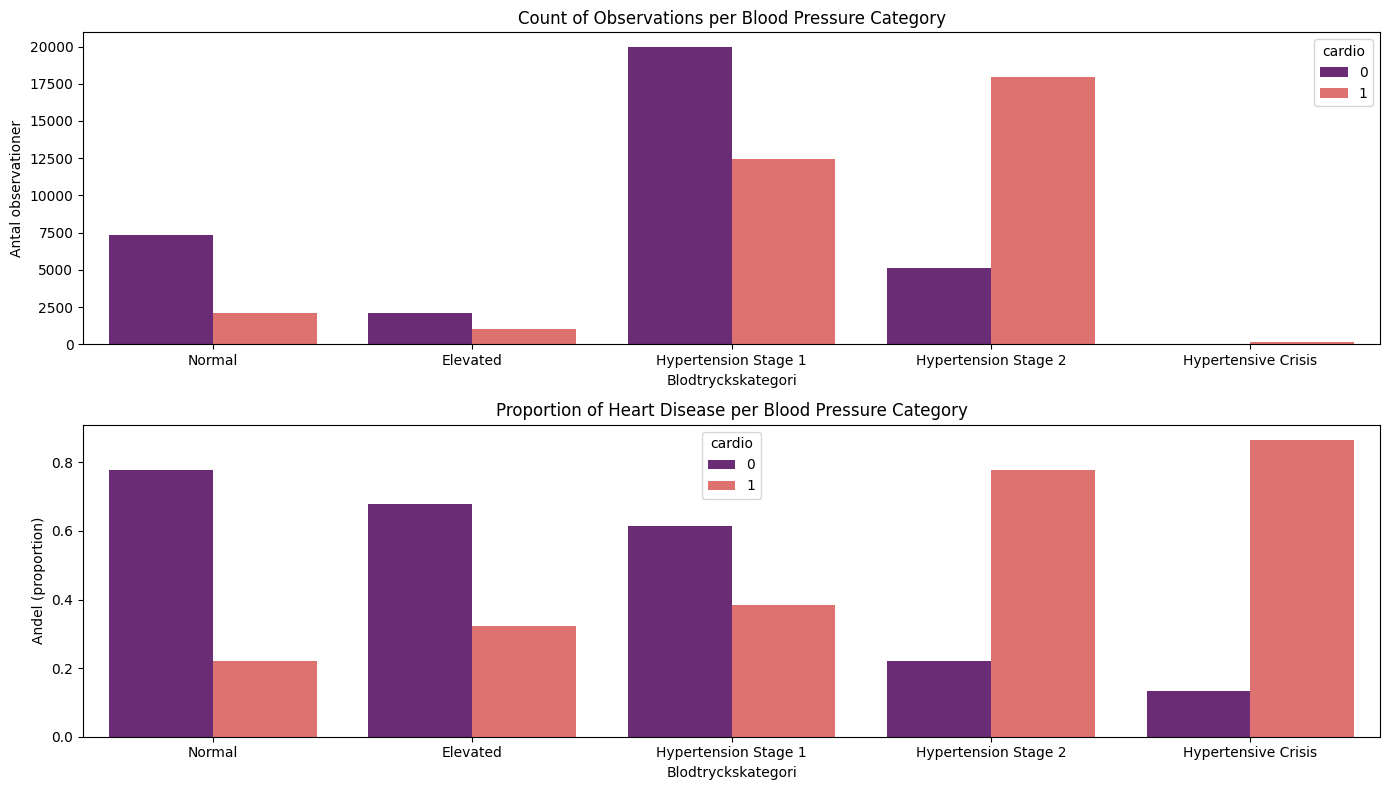

In [593]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

order = ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]

# Subplot 1: Countplot
sns.countplot(
    x='bp_category', 
    hue='cardio', 
    data=df_cardio, 
    palette='magma', 
    ax=axes[0],
    order=order
)
axes[0].set_title('Count of Observations per Blood Pressure Category')
axes[0].set_xlabel('Blodtryckskategori')
axes[0].set_ylabel('Antal observationer')

# Subplot 2: Barplot of proportions
grouped = df_cardio.groupby(['bp_category', 'cardio']).size().reset_index(name='count')
totals = grouped.groupby('bp_category')['count'].transform('sum')
grouped['proportion'] = grouped['count'] / totals

sns.barplot(
    x='bp_category', 
    y='proportion', 
    hue='cardio', 
    data=grouped, 
    palette='magma', 
    ax=axes[1],
    order=order
)
axes[1].set_title('Proportion of Heart Disease per Blood Pressure Category')
axes[1].set_xlabel('Blodtryckskategori')
axes[1].set_ylabel('Andel (proportion)')

plt.tight_layout()
plt.show()

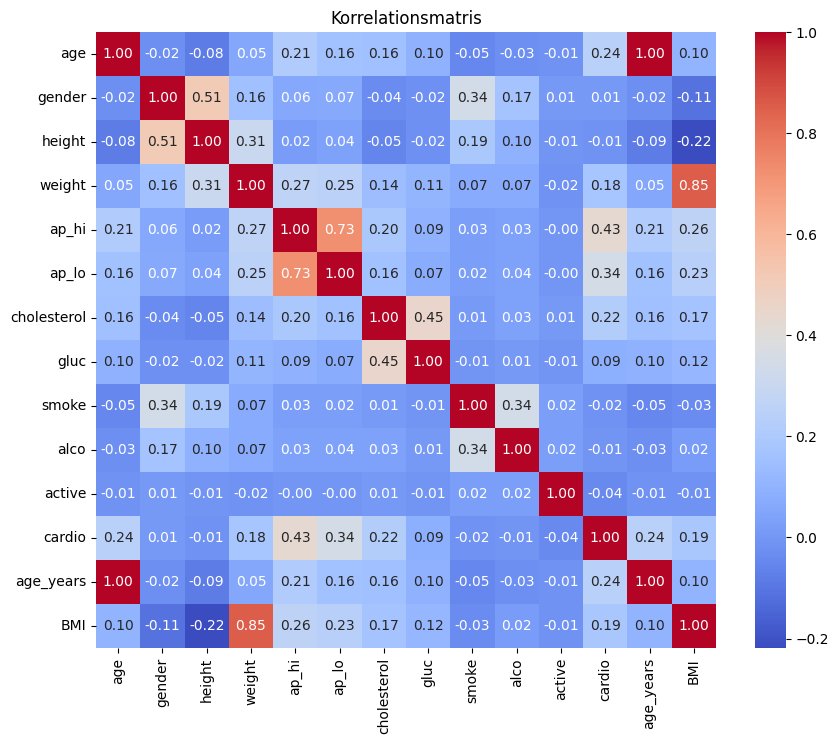

In [594]:
# 1. Beräkna korrelationsmatrisen
corr_matrix = df_cardio.corr(numeric_only=True)  # numeric_only=True för att endast ta med numeriska kolumner

# 2. Rita en heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatris')
plt.show()

färg palett:
https://seaborn.pydata.org/tutorial/color_palettes.html
plotta:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

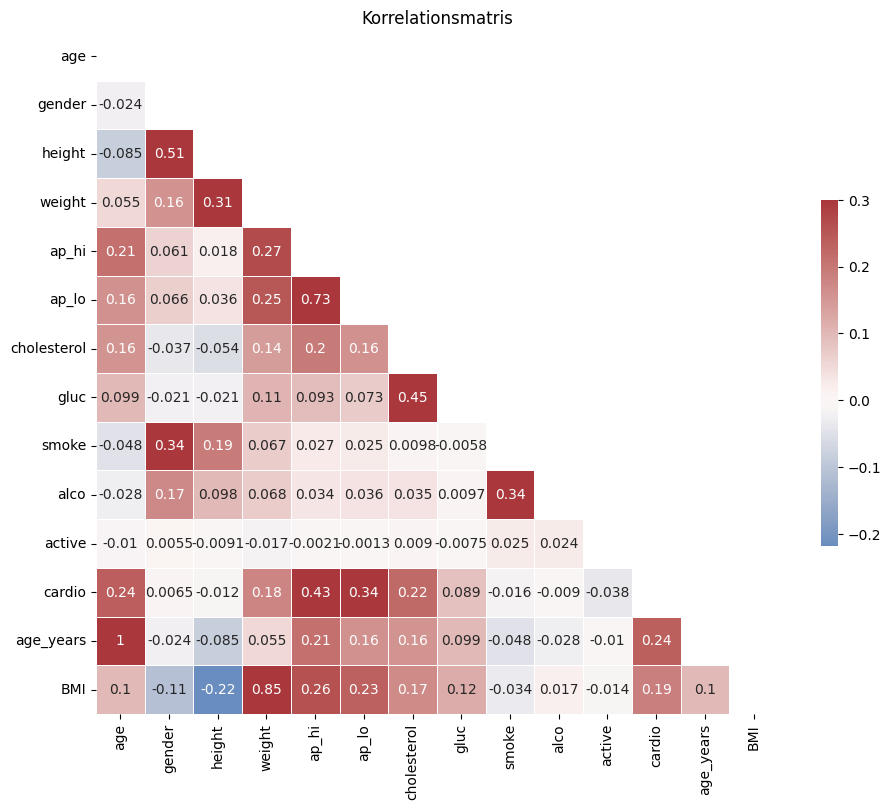

In [595]:
# Compute the correlation matrix for numeric columns only
corr = df_cardio.select_dtypes(include=[np.number]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# create diverging colormap

cmap = sns.color_palette("vlag", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korrelationsmatris')
plt.show()

Ser inga supersyarka korrleationer utöver vikt och BMI aóch att sytolsiknt och dystolsikt korrelrar men även glucose och cholesterol. Negativt korrelerat är Längd och BMI. 

### Skapa 2 dataset för one hot encoding 

In [596]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [597]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label', 'CVD',
       'age_years', 'BMI', 'BMI_cat', 'bp_category'],
      dtype='object')

In [598]:
import pandas as pd

# Anta att du har en DataFrame df
# Se till att df är av typen <class 'pandas.core.frame.DataFrame'>
print(type(df))

# Skapa en kopia av den ursprungliga DataFrame (med parenteser!)
df_copy = df_cardio.copy()

# --- Dataset 1 ---
# Ta bort följande features: ap_hi, ap_lo, height, weight, BMI
df1 = df_copy.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI", "gender_label", "CVD", "age_years"])

# Gör one-hot encoding på BMI-kategori, blodtryckskategori och kön
df1 = pd.get_dummies(df1, columns=["BMI_cat", "bp_category", "gender"])

# --- Dataset 2 ---
# Ta bort följande features: BMI-kategori, blodtryckskategori, height, weight
df2 = df_copy.drop(columns=["BMI_cat", "bp_category", "height", "weight", "gender_label", "CVD", "age_years"])

# Gör one-hot encoding på kön
df2 = pd.get_dummies(df2, columns=["gender"])

# Visa de första raderna för att verifiera
print("Dataset 1:")
print(df1.head())


<class 'pandas.core.frame.DataFrame'>
Dataset 1:
     age  cholesterol  gluc  smoke  alco  active  cardio  \
0  18393            1     1      0     0       1       0   
1  20228            3     1      0     0       1       1   
2  18857            3     1      0     0       0       1   
3  17623            1     1      0     0       1       1   
4  17474            1     1      0     0       0       0   

   BMI_cat_Normal range  BMI_cat_Obese (class I)  BMI_cat_Obese (class II)  \
0                  True                    False                     False   
1                 False                     True                     False   
2                  True                    False                     False   
3                 False                    False                     False   
4                  True                    False                     False   

   BMI_cat_Obese (class III)  BMI_cat_Out of range  BMI_cat_Overweight  \
0                      False                 Fa

In [599]:
df1.columns

Index(['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'BMI_cat_Normal range', 'BMI_cat_Obese (class I)',
       'BMI_cat_Obese (class II)', 'BMI_cat_Obese (class III)',
       'BMI_cat_Out of range', 'BMI_cat_Overweight', 'bp_category_Elevated',
       'bp_category_Hypertension Stage 1', 'bp_category_Hypertension Stage 2',
       'bp_category_Hypertensive Crisis', 'bp_category_Normal', 'gender_1',
       'gender_2'],
      dtype='object')

In [600]:
print("\nDataset 2:")
print(df2.head())


Dataset 2:
     age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio    BMI  \
0  18393    110     80            1     1      0     0       1       0  21.97   
1  20228    140     90            3     1      0     0       1       1  34.93   
2  18857    130     70            3     1      0     0       0       1  23.51   
3  17623    150    100            1     1      0     0       1       1  28.71   
4  17474    100     60            1     1      0     0       0       0  23.01   

   gender_1  gender_2  
0     False      True  
1      True     False  
2      True     False  
3     False      True  
4      True     False  


In [601]:
# gör train test split
from sklearn.model_selection import train_test_split    

# Sätt X och y för datset1
X1 = df1.drop(columns=["cardio"], axis=1)
y1 = df1["cardio"]

# Sätt X och y för datset2
X2 = df2.drop(columns=["cardio"], axis=1)
y2 = df2["cardio"]

# Dela upp datan i df1 i tränings- och testset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

# Dela upp datan i df2 i tränings- och testset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

# Kör X_train1 och y_train1 och X_train2 och y_train2 för att se storleken på dem
print("X_train1:", X_train1.shape, "y_train1:", y_train1.shape)
print("X_train2:", X_train2.shape, "y_train2:", y_train2.shape)





X_train1: (51133, 19) y_train1: (51133,)
X_train2: (51133, 11) y_train2: (51133,)


In [607]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Skapa en pipeline för att standardisera datan och träna en logistisk regression
pipe_log = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("logreg", LogisticRegression(max_iter=2500))
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_log = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__penalty": ["l1", "l2"],
    "logreg__solver": ["liblinear", "saga"]    

}
# Skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_log1 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1, verbose=1) #n_jobs=-1 för att använda alla kärnor
GridSearchCV_log2 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

# Hitta bästa parametrarna
GridSearchCV_log1.fit(X_train1, y_train1)
GridSearchCV_log2.fit(X_train2, y_train2)    

# skriv ut bästa parametrarna
print("Bästa parametrarna för dataset 1:", GridSearchCV_log1.best_params_) # Bästa parametrarna
print("Bästa cross-validering score för dataset 1:", GridSearchCV_log1.best_score_)  # Bästa cross-validering score
print("Bästa parametrarna för dataset 2:", GridSearchCV_log2.best_params_) # Bästa parametrarna
print("Bästa cross-validering score för dataset 2:", GridSearchCV_log2.best_score_)  # Bästa cross-validering score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Bästa parametrarna för dataset 1: {'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Bästa cross-validering score för dataset 1: 0.7213149536042303
Bästa parametrarna för dataset 2: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Bästa cross-validering score för dataset 2: 0.7282380592278341


	•	Enkel linjär modell (Logistic Regression)
	•	Träd-baserad ensemble (Random Forest)
	•	Kernel-baserad metod (SVM)
	•	Boosting-ensemble (Gradient Boosting/XGBoost)

In [609]:
# skapa en ny pipeline för att träna en random forest regression med de bästa parametrarna
from sklearn.ensemble import RandomForestClassifier
pipe_rnd = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("rnd", RandomForestClassifier())
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_rnd = {
    "rnd__n_estimators": [100, 200, 300],
    "rnd__max_depth": [5, 10, 15, 20],
    "rnd__min_samples_split": [2, 5, 10],
    "rnd__min_samples_leaf": [1, 2, 4]
}
 # skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_rnd1 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
GridSearchCV_rnd2 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

# Hitta bästa parametrarna
GridSearchCV_rnd1.fit(X_train1, y_train1)
GridSearchCV_rnd2.fit(X_train2, y_train2)

# skriv ut bästa parametrarna
print("Bästa parametrarna för dataset 1:", GridSearchCV_rnd1.best_params_)
print("Bästa cross-validering score för dataset 1:", GridSearchCV_rnd1.best_score_)
print("Bästa parametrarna för dataset 2:", GridSearchCV_rnd2.best_params_)
print("Bästa cross-validering score för dataset 2:", GridSearchCV_rnd2.best_score_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Bästa parametrarna för dataset 1: {'rnd__max_depth': 10, 'rnd__min_samples_leaf': 4, 'rnd__min_samples_split': 10, 'rnd__n_estimators': 100}
Bästa cross-validering score för dataset 1: 0.725773897900028
Bästa parametrarna för dataset 2: {'rnd__max_depth': 10, 'rnd__min_samples_leaf': 2, 'rnd__min_samples_split': 2, 'rnd__n_estimators': 100}
Bästa cross-validering score för dataset 2: 0.7356695750450688
